## HW4: Train a deep convolution network with PyTorch for the CIFAR10 dataset

You should use:
(A) data augmentation 
(B) trained with ADAM
(C) dropout
(D) L2-regularization (Extra score*)


In [ ]:
#@title Student Information
#@markdown Enter the following info and run the cell:
Name = "Samin Heydarian" #@param {type:"string"}
StudentNumber =  99722058#@param {type:"integer"}

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [ ]:
# Data augmentation
print("... Data Augmentation ...")

transform_train = transforms.Compose([
                  transforms.RandomHorizontalFlip(),
                  transforms.RandomVerticalFlip(),
                  transforms.ToTensor(),
                  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                  ])


transform_test = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

... Data Augmentation ...


In [ ]:


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


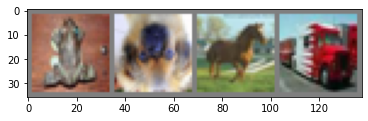

 frog   dog horse truck


In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Define a Convolutional Neural Network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )

    def forward(self, x):

        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)
        return x
        
net = CNN()
if torch.cuda.is_available():
  net = net.cuda()

In [ ]:
# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
if torch.cuda.is_available():
  criterion = criterion.cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
# Train the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        if torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.910
[1,  4000] loss: 1.639
[1,  6000] loss: 1.468
[1,  8000] loss: 1.343
[1, 10000] loss: 1.282
[1, 12000] loss: 1.188
[2,  2000] loss: 1.092
[2,  4000] loss: 1.052
[2,  6000] loss: 0.998
[2,  8000] loss: 0.982
[2, 10000] loss: 0.944
[2, 12000] loss: 0.913
[3,  2000] loss: 0.875
[3,  4000] loss: 0.851
[3,  6000] loss: 0.840
[3,  8000] loss: 0.797
[3, 10000] loss: 0.816
[3, 12000] loss: 0.789
[4,  2000] loss: 0.750
[4,  4000] loss: 0.742
[4,  6000] loss: 0.734
[4,  8000] loss: 0.721
[4, 10000] loss: 0.717
[4, 12000] loss: 0.692
[5,  2000] loss: 0.669
[5,  4000] loss: 0.677
[5,  6000] loss: 0.661
[5,  8000] loss: 0.636
[5, 10000] loss: 0.650
[5, 12000] loss: 0.647
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

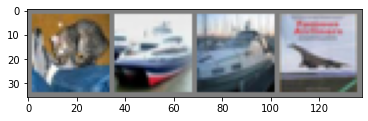

GroundTruth:    cat  ship  ship plane


In [ ]:
# Test the network on the test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
#net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   cat   car   cat


In [ ]:
correct = 0
total = 0
confusion_matrix = torch.zeros(len(classes), len(classes))
with torch.no_grad():
    for data in testloader:
        images, labels = data

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        for t, p in zip(labels.view(-1), predicted.view(-1)):
          confusion_matrix[t.long(), p.long()] += 1

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 75 %


In [ ]:
classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')

In [ ]:
print(confusion_matrix)

tensor([[782.,  10.,  50.,  26.,   7.,   3.,   5.,   7.,  52.,  58.],
        [ 13., 787.,   7.,   2.,   3.,   0.,  10.,   0.,  26., 152.],
        [ 51.,   2., 705.,  59.,  47.,  18.,  81.,  15.,  11.,  11.],
        [ 19.,   6., 104., 603.,  30.,  76., 105.,  28.,  11.,  18.],
        [  9.,   0., 103.,  63., 684.,  22.,  74.,  36.,   4.,   5.],
        [ 10.,   4.,  78., 248.,  32., 549.,  33.,  33.,   2.,  11.],
        [ 10.,   3.,  44.,  38.,  12.,   7., 880.,   1.,   2.,   3.],
        [ 10.,   1.,  51.,  64.,  38.,  30.,   8., 777.,   3.,  18.],
        [ 58.,  26.,  17.,   8.,   4.,   2.,  12.,   2., 820.,  51.],
        [  8.,  23.,   6.,  10.,   0.,   3.,   5.,   5.,  11., 929.]])


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 79 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 79 %
Accuracy of   car : 78 %
Accuracy of  bird : 68 %
Accuracy of   cat : 59 %
Accuracy of  deer : 67 %
Accuracy of   dog : 54 %
Accuracy of  frog : 89 %
Accuracy of horse : 78 %
Accuracy of  ship : 83 %
Accuracy of truck : 92 %
